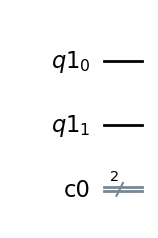

In [3]:
from qiskit import *
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)
%matplotlib inline
circuit.draw(output='mpl')

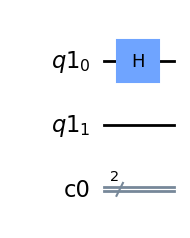

In [4]:
circuit.h(qr[0])
circuit.draw(output='mpl')

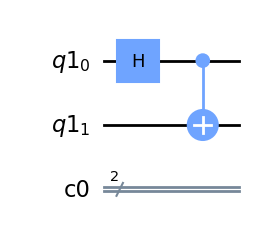

In [5]:
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

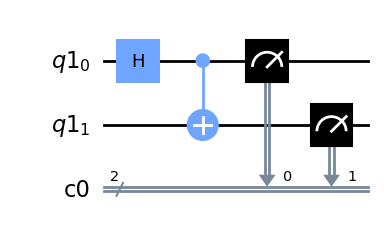

In [6]:
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [15]:
simulator=Aer.get_backend('qasm_simulator')
results=execute(circuit,backend=simulator,shots=1000).result()

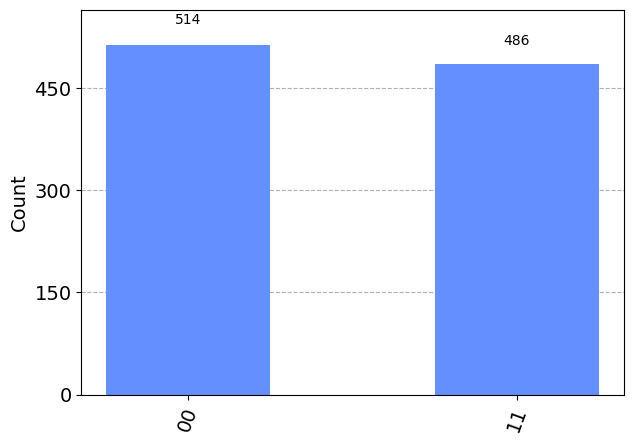

In [16]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(results.get_counts(circuit))

In [25]:
IBMQ.save_account('fc9764d6ddc72b895aec2189a792025fe4e8a37698378c45198dd34d1dd2411ef27f8297105e2c6fcb7884bc9a31c4efdc6f7127bfbdfc06e2d3c8cee5237375')
IBMQ.load_account()


configrc.store_credentials:WARNING:2023-08-18 12:41:47,949: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-08-18 12:41:48,435: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
from qiskit_ibm_provider import IBMProvider
provider=IBMProvider(instance='summer-school-5/group-10/7048810629')
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
comp=least_busy(provider.backends(filters= lambda b: b.configuration().n_qubits>=2 and not b.configuration().simulator and b.status().operational==True))
job=execute(circuit, backend=comp, shots=1000)
job_monitor(job)

ModuleNotFoundError: No module named 'qiskit_ibm_provider'

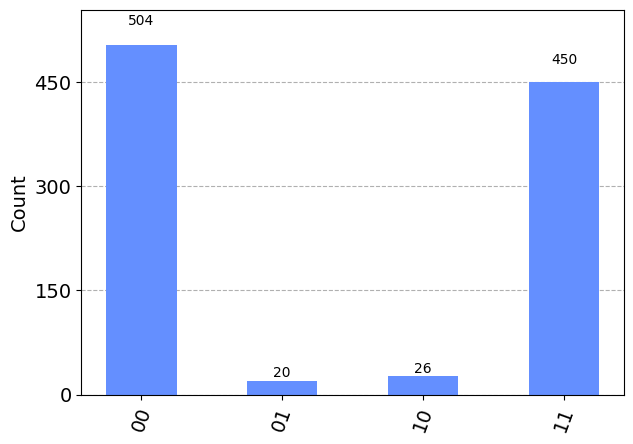

In [24]:
result=job.result()
plot_histogram(result.get_counts(circuit))
